<a href="https://colab.research.google.com/github/karthisha-13/AIML_2303A52099/blob/main/2303A52099_14_BT_NO_33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_path = '/content/Real estate valuation data set.xlsx'
data = pd.read_excel(file_path)



In [3]:
print(data.head())


   No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [9]:


X = data[['X5 latitude', 'X6 longitude']]
y = data['Y house price of unit area']  # Assuming this is the correct column name for the target variable

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


In [5]:
print(data.describe())

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148953     17.712560   
std    119.655756             0.281995     11.392485   
min      1.000000          2012.666667      0.000000   
25%    104.250000          2012.916667      9.025000   
50%    207.500000          2013.166667     16.100000   
75%    310.750000          2013.416667     28.150000   
max    414.000000          2013.583333     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 82.08014010114125
R^2 Score: 0.5107280334989206


In [18]:

new_property = pd.DataFrame({'X5 latitude': [34.0522], 'X6 longitude': [-118.2437]})


predicted_price = model.predict(new_property)
print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: -70467.04935731471


In [41]:
print("Column names in the dataset:")
print(data.columns)




top_houses = data[['X2 house age', 'Y house price of unit area']].sort_values(by='Y house price of unit area', ascending=False).head(5)


print(top_houses)

Column names in the dataset:
Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area', 'Price per Unit Area',
       'Transaction Date'],
      dtype='object')
     X2 house age  Y house price of unit area
270          10.8                       117.5
220          37.2                        78.3
312          35.4                        78.0
166           0.0                        73.6
105           0.0                        71.0


Column names in the dataset:
Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')
                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.454
Model:                                    OLS   Adj. R-squared:                  0.452
Method:                         Least Squares   F-statistic:                     342.2
Date:                        Tue, 26 Nov 2024   Prob (F-statistic):           4.64e-56
Time:                                04:21:33   Log-Likelihood:                -1542.5
No. Observations:                         414   AIC:                             3089.
Df Residuals:                             412   BIC:                             3097.
Df Model:                                

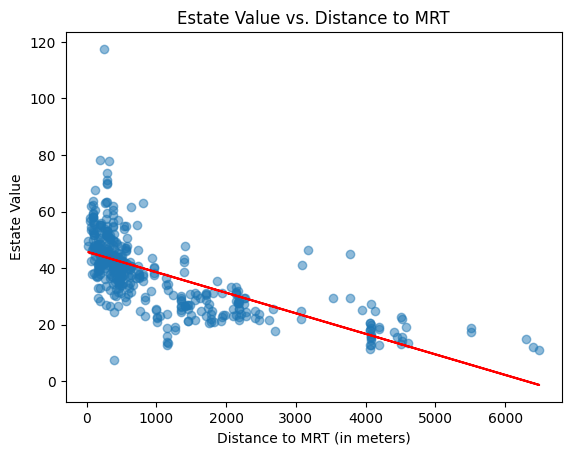

In [32]:

import statsmodels.api as sm

print("Column names in the dataset:")
print(data.columns)


X = data[['X3 distance to the nearest MRT station']]
y = data['Y house price of unit area']


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print(model.summary())


import matplotlib.pyplot as plt

plt.scatter(data['X3 distance to the nearest MRT station'], data['Y house price of unit area'], alpha=0.5)
plt.plot(data['X3 distance to the nearest MRT station'], model.predict(X), color='red')
plt.title('Estate Value vs. Distance to MRT')
plt.xlabel('Distance to MRT (in meters)')
plt.ylabel('Estate Value')
plt.show()

In [34]:



data['Price per Unit Area'] = data['Y house price of unit area'] / data['X5 latitude']


max_price_per_unit_area = data['Price per Unit Area'].max()
min_price_per_unit_area = data['Price per Unit Area'].min()


print(f"Maximum Price per Unit Area: {max_price_per_unit_area}")
print(f"Minimum Price per Unit Area: {min_price_per_unit_area}")

Maximum Price per Unit Area: 4.704780056537443
Minimum Price per Unit Area: 0.3044661986433627


In [43]:

data['Transaction Date'] = pd.to_datetime(data['X1 transaction date'])






transaction_counts = data['Transaction Date'].value_counts()


most_transactions_date = transaction_counts.idxmax()
most_transactions_count = transaction_counts.max()


print(f"The date with the most transactions is: {most_transactions_date.date()} with {most_transactions_count} transactions.")

The date with the most transactions is: 1970-01-01 with 288 transactions.


In [44]:
distance_thresholds = [0, 500, 1000, 1500, 2000, 2500, 3000]

average_values = []




for threshold in distance_thresholds:

    filtered_data = data[(data['X3 distance to the nearest MRT station'] <= threshold) | (data['X4 number of convenience stores'] <= threshold)]



    avg_estate_value = filtered_data['Y house price of unit area'].mean()

    average_values.append((threshold, avg_estate_value))

average_values_df = pd.DataFrame(average_values, columns=['Distance Threshold', 'Average Estate Value'])


print(average_values_df)


highest_avg_value_row = average_values_df.loc[average_values_df['Average Estate Value'].idxmax()]


print(f"The closest distance perimeter for higher real estate value is: {highest_avg_value_row['Distance Threshold']} with an average estate value of {highest_avg_value_row['Average Estate Value']}.")

   Distance Threshold  Average Estate Value
0                   0             26.462687
1                 500             37.980193
2                1000             37.980193
3                1500             37.980193
4                2000             37.980193
5                2500             37.980193
6                3000             37.980193
The closest distance perimeter for higher real estate value is: 500.0 with an average estate value of 37.980193236714975.
